# 추천 엔진 개요

* 제품 정보와 사용자 정보와 같은 엄청난 양의 데이터를 분석하고 데이터 마이닝 방식을 기반으로 연관 추천을 제공하는 기술이자 도구
* 사용자가 얼마나 해당 항목을 좋아할지 예측할 수 있는 수학적 모델 또는 목적 함수를 개발하는 것이 중요 과제
* 많은 선택 가능한 제품들 사이에세 가장 좋은 결정을 내릴 수 있도록 적절한 추천을 하는 것이 목표

# 추천 엔진의 종류

* 협업 필터링 추천 시스템 : 사용자 선호도를 이용해서 선택 가능한 많은 집합들로부터 아이템을 필터링함
  
* 사용자 기반 협업 필터링 : 사용자 주변의 취향을 고려해 추천
  1. 유사한 선호도를 가진 사용자를 발견
  2. 활성 사용자는 아직 등급을 매기지 않은 아이템에 대해 유사한 사용자가 제공한 등급을 참고해 활성 사용자에게 새로운 아이템을 추천 
<br>
<br>
* 아이템 기반 협업 필터링 : 아이템의 유사 제품을 이용해 추천
  1. 아이템 선호도를 기반으로 아이템 유사도를 계산
  2. 활성 사용자가 과거 평가한 아이템과 가장 유사한 아직 평가하지 않은 아이템을 찾아서 추천
<br>
<br>
* 콘텐츠 기반 추천 시스템 : 아이템의 콘텐츠 정보를 활용. 아이템 속성과 해당 아이템 속성에 대한 사용자 선호도를 사용해 추천
<br>
<br>
* 하이브리드 추천 시스템 : 콘텐츠 기반 추천 시스템 + 협업 필터링 추천 시스템
* 상황 인식 추천 시스템 : 추천 항목을 계산하기 전에 시각, 계절, 분위기, 장소 등의 상황을 고려하는 유형의 추천 시스템

## 협업 필터링 개요

* 어떤 특정인이 새로운 아이템에 대해 어떤 선호도를 갖는지를 예측하고자 할 때, 그 아이템에 대한 다른 다수의 선호도 집합을 활용하는 방법
* `유사하다는 것`은 단순히 나이나 성별 등을 의미하는 것이 아니라, `사용자에 의해 표현된 선호도`, 예를 들면 비슷한 상품을 구입했거나, 상품에 대한 평가 등이 유사한 것을 의미
* 아이템의 내용을 반드시 알아야 할 필요가 없음
* 정보가 없는 새로운 아이템에 대해 고객이 구매하기 전에도 아이템을 평가 예측할 수 있음
* 시간의 흐름에 따른 고객의 선호도 변화를 감지하는 유연성을 가짐

# 추천 엔진 모델의 평가

* 평균제곱오차(Mean Squared Error)
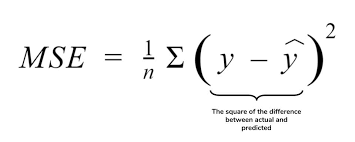<br>
$y$ : 실제값 <br>
$\hat y$ : 예측값<br>
$y - \hat y$ : 잔차 <br>

* 평균제곱근오차(RMSE : Root Mean Squared Error) : 변수 척도와 통일한 차원을 가지므로 오차항이 본래의 값과 비교해 얼마나 큰지 바로 분석할 수 있음
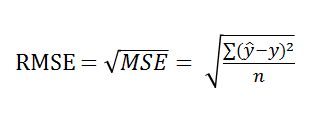

# 협업 필터링을 이용한 영화 추천 엔진

## 데이터 준비

https://grouplens.org/datasets/movielens/100k/
* MovieLens 100k(100,000) Dataset
* 1682개의 영화에 대한 943명의 사용자 평가

In [2]:
import pandas as pd

df = pd.read_csv('./ml-100k/u.data', sep='\t', header=None)
df.columns = ['user_id', 'item_id', 'rating', 'timestamp']
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
df.shape 

 # 전체 구조 
 # 행 : 100,000개
 # 열 : 4개

(100000, 4)

## 데이터 탐색

In [6]:
# rating별 user_id 개수

df.groupby(['rating'])[['user_id']].count()

,user_id
rating,
1,6110
2,11370
3,27145
4,34174
5,21201


In [7]:
# item_id 별 user_id 개수
df.groupby(['item_id'])[['user_id']].count()

,user_id
item_id,
1,452
2,131
3,90
4,209
5,86
...,...
1678,1
1679,1
1680,1


## 평가 행렬(ratings) 생성

In [8]:
n_users = df.user_id.unique().shape[0]
n_users  # 사용자 명수

943

In [9]:
n_items = df.item_id.unique().shape[0]
n_items # 영화 개수

1682

In [10]:
import numpy as np

ratings = np.zeros((n_users, n_items))
ratings.shape

# (사용자, 영화) --> 평점 정보(1~5) 넣기.
# Sparse matrix 역할 수행

(943, 1682)

In [12]:
for row in df.itertuples() :
    ratings[row[1]-1, row[2]-1] = row[3] # (사용자, 영화) = 평점

type(ratings)

numpy.ndarray

In [14]:
ratings.shape

(943, 1682)

In [15]:
ratings

# 0 : 해당 사용자가 해당 영화를 보지 않은 경우

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

## 훈련 데이터와 테스트 데이터 분리

In [16]:
from sklearn.model_selection import train_test_split

ratings_train, ratings_test = train_test_split(ratings, test_size=0.33, random_state=42)
ratings_train.shape, ratings_test.shape

((631, 1682), (312, 1682))

## 1. 사용자 간 유사도 행렬 생성

* `코사인 유사도` : 내적 공간의 두 벡터의 사이각에 대한 코사인을 측정해 유사도를 나타내는 척도
* cos(0) == 1, cos($\theta$) < 1
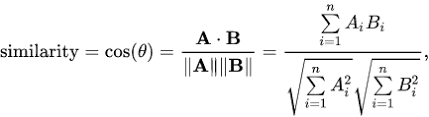
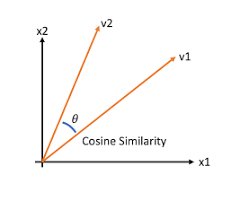
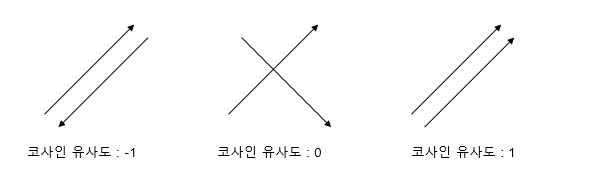

In [17]:
from sklearn.metrics.pairwise import cosine_distances # 코사인 유사도

cosine_distances(ratings_train)
# 주대각이 0

array([[0.        , 0.63524236, 0.55753769, ..., 0.97989359, 0.66892071,
        0.74361482],
       [0.63524236, 0.        , 0.57364745, ..., 0.93305581, 0.72660686,
        0.77662732],
       [0.55753769, 0.57364745, 0.        , ..., 0.93324244, 0.74575627,
        0.77679874],
       ...,
       [0.97989359, 0.93305581, 0.93324244, ..., 0.        , 0.95146572,
        0.94857492],
       [0.66892071, 0.72660686, 0.74575627, ..., 0.95146572, 0.        ,
        0.8801978 ],
       [0.74361482, 0.77662732, 0.77679874, ..., 0.94857492, 0.8801978 ,
        0.        ]])

In [19]:
distances = 1 - cosine_distances(ratings_train)
distances
# 주대각 0말고 1이 되도록

array([[1.        , 0.36475764, 0.44246231, ..., 0.02010641, 0.33107929,
        0.25638518],
       [0.36475764, 1.        , 0.42635255, ..., 0.06694419, 0.27339314,
        0.22337268],
       [0.44246231, 0.42635255, 1.        , ..., 0.06675756, 0.25424373,
        0.22320126],
       ...,
       [0.02010641, 0.06694419, 0.06675756, ..., 1.        , 0.04853428,
        0.05142508],
       [0.33107929, 0.27339314, 0.25424373, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.25638518, 0.22337268, 0.22320126, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [22]:
distances.shape
# 전체 사용자 631명.
# Square matrix가 만들어짐

(631, 631)

### 평가 예측 및 모델의 성능 측정

In [23]:
user_pred = distances.dot(ratings_train) / np.array([np.abs(distances).sum(axis=1)]).T

In [27]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual) :
    pred = pred[actual.nonzero()].flatten()  # 0값이 아닌 값들에 대해서만 1차원으로 생성
    actual = actual[actual.nonzero()].flatten() # 0값이 아닌 값들에 대해서만 1차원으로 생성
    return mean_squared_error(pred, actual) 

In [28]:
np.sqrt(get_mse(user_pred, ratings_train))

2.8075245308903365

In [29]:
np.sqrt(get_mse(user_pred, ratings_test))

2.9870546415652575

## 2. 가장 비슷한 n명을 찾는 비지도 방식의 이웃 검색

앞서 했던 방식은 모든 사용자(N)에 대해서 비교를 했었다.
만약 모든 사용자(N)이 매우 컸을 때, 비슷한 사용자를 찾는 데에 시간이 많이 든다.

`따라서 가장 비슷한 n명을 찾는 비지도 방식의 이웃 검색`을 사용한다.
==> K-Nearest Neighbors와 유사한데, KNN은 답이 있어야 하는 지도방식이었다. 

`비지도 방식으로 이웃을 검색할 수 있는 Library --> NearestNeighbors`

In [30]:
from sklearn.neighbors import NearestNeighbors

k = 5 # 가장 비슷한 5명
neigh = NearestNeighbors(n_neighbors=k, metric='cosine')

In [31]:
neigh.fit(ratings_train)

NearestNeighbors(metric='cosine')

In [32]:
# 가장 비슷한 5명의 거리, 사용자
top_k_distances, top_k_users = neigh.kneighbors(ratings_train, return_distance=True)

In [33]:
top_k_distances.shape, top_k_users.shape

((631, 5), (631, 5))

In [34]:
top_k_users

# 전체 사용자 631명 각각 가장 비슷한 5명의 사용자
# 0번 사용자는 0, 589, 155, 33, 362번 사용자하고만 비교하면 된다. 

array([[  0, 589, 155,  33, 364],
       [  1, 483, 339, 172, 188],
       [  2, 382, 560, 350, 155],
       ...,
       [628, 258, 242, 229, 494],
       [629, 378, 155, 589, 591],
       [630, 495, 201, 417, 603]])

In [36]:
top_k_distances 

# 전체 사용자 631명 각각 가장 비슷한 5명의 사용자와의 거리

array([[0.        , 0.38230161, 0.39990633, 0.40834169, 0.4100445 ],
       [0.        , 0.4625691 , 0.50677921, 0.50811827, 0.50882566],
       [0.        , 0.46538829, 0.48267976, 0.49176259, 0.49265099],
       ...,
       [0.        , 0.5764934 , 0.59340849, 0.64699606, 0.66472075],
       [0.        , 0.60496802, 0.6115226 , 0.62054374, 0.6229481 ],
       [0.        , 0.56320216, 0.60221688, 0.60314589, 0.6400121 ]])

### 선택된 n명의 사용자들의 평가 가중치 합을 사용한 예측 및 모델의 성능 측정

In [37]:
user_pred_k = np.zeros(ratings_train.shape)

for i in range(ratings_train.shape[0]) :
    user_pred[i, :] = \
    top_k_distances[i].T.dot(ratings_train[top_k_users][i]) \
    / np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T
    


In [38]:
user_pred_k.shape

(631, 1682)

In [39]:
np.sqrt(get_mse(user_pred, ratings_train))

2.0922014531938316

In [40]:
np.sqrt(get_mse(user_pred, ratings_test))

3.054698791142718